In [ ]:
# Сравните производительность на MNIST:
# - Полносвязная сеть (3-4 слоя)
# - Простая CNN (2-3 conv слоя)
# - CNN с Residual Block
# 
# Для каждого варианта:
# - Обучите модель с одинаковыми гиперпараметрами
# - Сравните точность на train и test множествах
# - Измерьте время обучения и инференса
# - Визуализируйте кривые обучения
# - Проанализируйте количество параметров

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.21MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 148kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.12MB/s]



FCN (параметров: 567434)


100%|██████████| 157/157 [00:00<00:00, 287.97it/s]


Epoch 1/5:
Train Loss: 0.2502, Train Acc: 0.9225
Test Loss: 0.1090, Test Acc: 0.9663
--------------------------------------------------


100%|██████████| 157/157 [00:00<00:00, 296.23it/s]


Epoch 2/5:
Train Loss: 0.1196, Train Acc: 0.9632
Test Loss: 0.0836, Test Acc: 0.9729
--------------------------------------------------


100%|██████████| 157/157 [00:00<00:00, 307.24it/s]


Epoch 3/5:
Train Loss: 0.0925, Train Acc: 0.9713
Test Loss: 0.0880, Test Acc: 0.9731
--------------------------------------------------


100%|██████████| 157/157 [00:00<00:00, 268.62it/s]


Epoch 4/5:
Train Loss: 0.0773, Train Acc: 0.9761
Test Loss: 0.0762, Test Acc: 0.9767
--------------------------------------------------


100%|██████████| 157/157 [00:00<00:00, 315.84it/s]


Epoch 5/5:
Train Loss: 0.0673, Train Acc: 0.9792
Test Loss: 0.0726, Test Acc: 0.9788
--------------------------------------------------


100%|██████████| 157/157 [00:00<00:00, 288.03it/s]


Epoch 1/1:
Train Loss: 0.0936, Train Acc: 0.9744
Test Loss: 0.0459, Test Acc: 0.9853
--------------------------------------------------


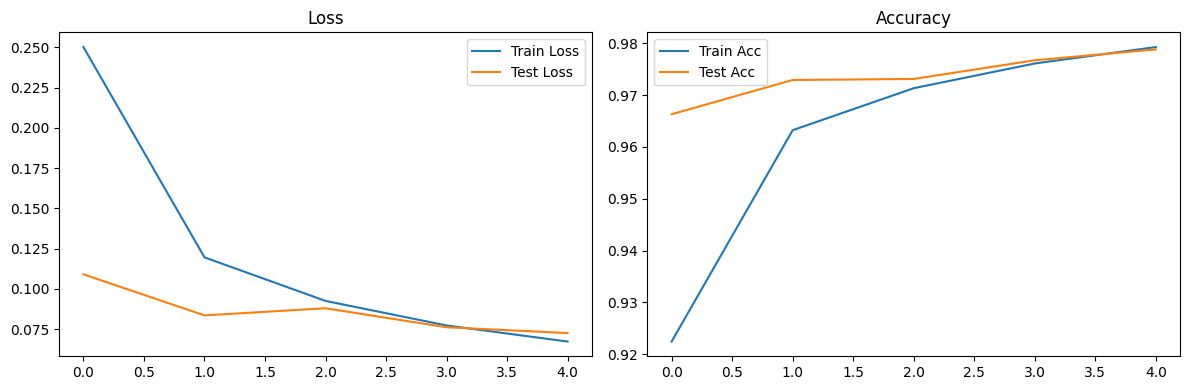


SimpleCNN (параметров: 421642)


100%|██████████| 157/157 [00:01<00:00, 88.24it/s]


Epoch 1/5:
Train Loss: 0.1567, Train Acc: 0.9513
Test Loss: 0.0455, Test Acc: 0.9846
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 95.44it/s]


Epoch 2/5:
Train Loss: 0.0550, Train Acc: 0.9832
Test Loss: 0.0326, Test Acc: 0.9882
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 92.07it/s]


Epoch 3/5:
Train Loss: 0.0391, Train Acc: 0.9880
Test Loss: 0.0316, Test Acc: 0.9900
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 93.96it/s]


Epoch 4/5:
Train Loss: 0.0318, Train Acc: 0.9903
Test Loss: 0.0311, Test Acc: 0.9898
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 94.46it/s]


Epoch 5/5:
Train Loss: 0.0255, Train Acc: 0.9919
Test Loss: 0.0248, Test Acc: 0.9918
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 94.78it/s]


Epoch 1/1:
Train Loss: 0.0350, Train Acc: 0.9895
Test Loss: 0.0100, Test Acc: 0.9971
--------------------------------------------------


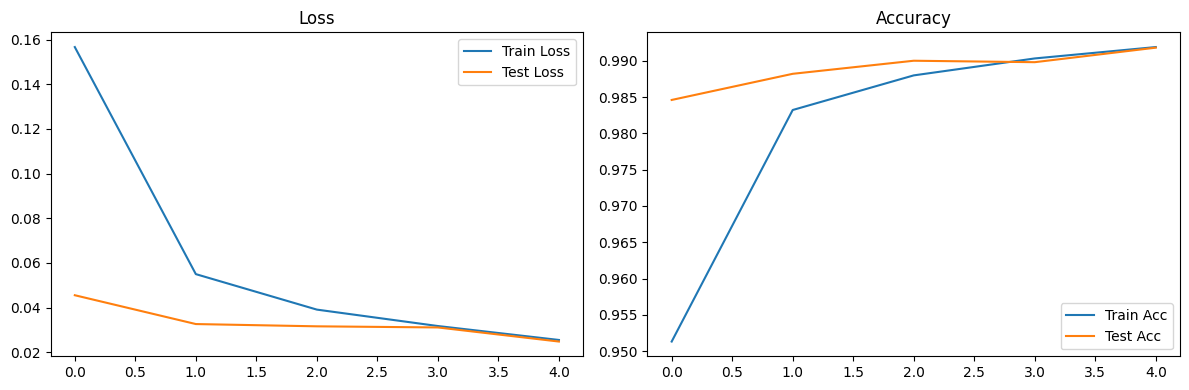


ResNetCNN (параметров: 160906)


100%|██████████| 157/157 [00:06<00:00, 22.91it/s]


Epoch 1/5:
Train Loss: 0.1014, Train Acc: 0.9713
Test Loss: 0.0436, Test Acc: 0.9862
--------------------------------------------------


100%|██████████| 157/157 [00:06<00:00, 22.57it/s]


Epoch 2/5:
Train Loss: 0.0380, Train Acc: 0.9878
Test Loss: 0.0250, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:06<00:00, 22.52it/s]


Epoch 3/5:
Train Loss: 0.0289, Train Acc: 0.9907
Test Loss: 0.0290, Test Acc: 0.9903
--------------------------------------------------


100%|██████████| 157/157 [00:07<00:00, 21.81it/s]


Epoch 4/5:
Train Loss: 0.0261, Train Acc: 0.9917
Test Loss: 0.0332, Test Acc: 0.9890
--------------------------------------------------


100%|██████████| 157/157 [00:07<00:00, 21.95it/s]


Epoch 5/5:
Train Loss: 0.0218, Train Acc: 0.9930
Test Loss: 0.0461, Test Acc: 0.9862
--------------------------------------------------


100%|██████████| 157/157 [00:07<00:00, 21.85it/s]


Epoch 1/1:
Train Loss: 0.0252, Train Acc: 0.9922
Test Loss: 0.0197, Test Acc: 0.9935
--------------------------------------------------


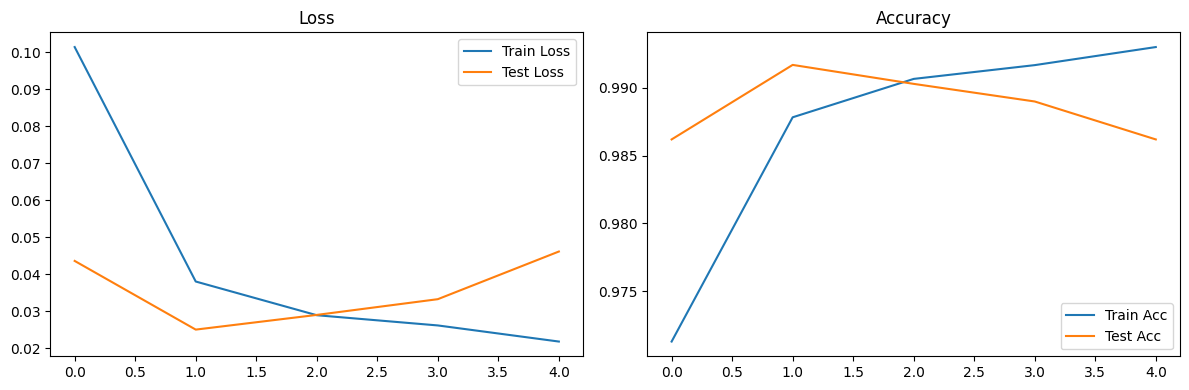


Сравнение моделей:

Model           Train Acc  Test Acc   Train Time (s)  Infer Time (s)  Params    
---------------------------------------------------------------------------
FCN             0.9792     0.9788     28.63           1.38            567434    
SimpleCNN       0.9919     0.9918     134.88          5.78            421642    
ResNetCNN       0.9930     0.9862     905.25          36.13           160906    


In [2]:
import time
import torch
from datasets import get_mnist_loaders
from models import SimpleCNN, CNNWithResidual,FullyConnectedModel
from trainer import train_model
from utils import plot_training_history, count_parameters

device = torch.device("mps" if torch.mps.is_available() else "cpu")
train_loader, test_loader = get_mnist_loaders(batch_size=64)

# Полносвязная сеть
fcn_config = {
    "layers": [
        {"type": "linear", "size": 512},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.25},
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "linear", "size": 128},
        {"type": "relu"}
    ]
}
fcn = FullyConnectedModel(**fcn_config).to(device)

# Простая CNN
simple_cnn = SimpleCNN(input_channels=1, num_classes=10).to(device)

# CNN с Residual блоками
residual_cnn = CNNWithResidual(input_channels=1, num_classes=10).to(device)

models = {
    "FCN": fcn,
    "SimpleCNN": simple_cnn,
    "ResNetCNN": residual_cnn
}

results = {}

for name, model in models.items():
    print(f"\n{name} (параметров: {count_parameters(model)})")
    
    start_train = time.time()
    history = train_model(model, train_loader, test_loader, epochs=5, device=device)
    end_train = time.time()
    
    # Время инференса
    start_infer = time.time()
    _ = train_model(model, test_loader, test_loader, epochs=1, device=device)
    end_infer = time.time()
    
    history['train_time'] = end_train - start_train
    history['infer_time'] = end_infer - start_infer
    history['params'] = count_parameters(model)
    
    results[name] = history
    plot_training_history(history)

# --- Сравнительная таблица ---
print("\nСравнение моделей:\n")
print(f"{'Model':<15} {'Train Acc':<10} {'Test Acc':<10} {'Train Time (s)':<15} {'Infer Time (s)':<15} {'Params':<10}")
print("-" * 75)
for name, hist in results.items():
    print(f"{name:<15} {hist['train_accs'][-1]:<10.4f} {hist['test_accs'][-1]:<10.4f} {hist['train_time']:<15.2f} {hist['infer_time']:<15.2f} {hist['params']:<10}")


In [ ]:
# Сравните производительность на CIFAR-10:
# - Полносвязная сеть (глубокая)
# - CNN с Residual блоками
# - CNN с регуляризацией и Residual блоками
# 
# Для каждого варианта:
# - Обучите модель с одинаковыми гиперпараметрами
# - Сравните точность и время обучения
# - Проанализируйте переобучение
# - Визуализируйте confusion matrix
# - Исследуйте градиенты (gradient flow)

Устройство: mps
Обучение модели FCN (Параметров: 820874)


100%|██████████| 157/157 [00:01<00:00, 153.36it/s]


Epoch 1/10:
Train Loss: 1.6563, Train Acc: 0.4144
Test Loss: 1.5391, Test Acc: 0.4579
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 148.04it/s]


Epoch 2/10:
Train Loss: 1.4632, Train Acc: 0.4826
Test Loss: 1.4812, Test Acc: 0.4789
--------------------------------------------------


100%|██████████| 157/157 [00:00<00:00, 157.55it/s]


Epoch 3/10:
Train Loss: 1.3673, Train Acc: 0.5168
Test Loss: 1.4153, Test Acc: 0.4987
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 151.29it/s]


Epoch 4/10:
Train Loss: 1.2888, Train Acc: 0.5422
Test Loss: 1.4159, Test Acc: 0.5019
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 155.37it/s]


Epoch 5/10:
Train Loss: 1.2245, Train Acc: 0.5667
Test Loss: 1.4142, Test Acc: 0.5106
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 151.21it/s]


Epoch 6/10:
Train Loss: 1.1723, Train Acc: 0.5860
Test Loss: 1.3928, Test Acc: 0.5212
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 151.14it/s]


Epoch 7/10:
Train Loss: 1.1127, Train Acc: 0.6036
Test Loss: 1.4184, Test Acc: 0.5206
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 153.34it/s]


Epoch 8/10:
Train Loss: 1.0617, Train Acc: 0.6227
Test Loss: 1.4454, Test Acc: 0.5169
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 153.99it/s]


Epoch 9/10:
Train Loss: 1.0090, Train Acc: 0.6412
Test Loss: 1.4679, Test Acc: 0.5157
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 153.13it/s]


Epoch 10/10:
Train Loss: 0.9679, Train Acc: 0.6550
Test Loss: 1.5258, Test Acc: 0.5106
--------------------------------------------------


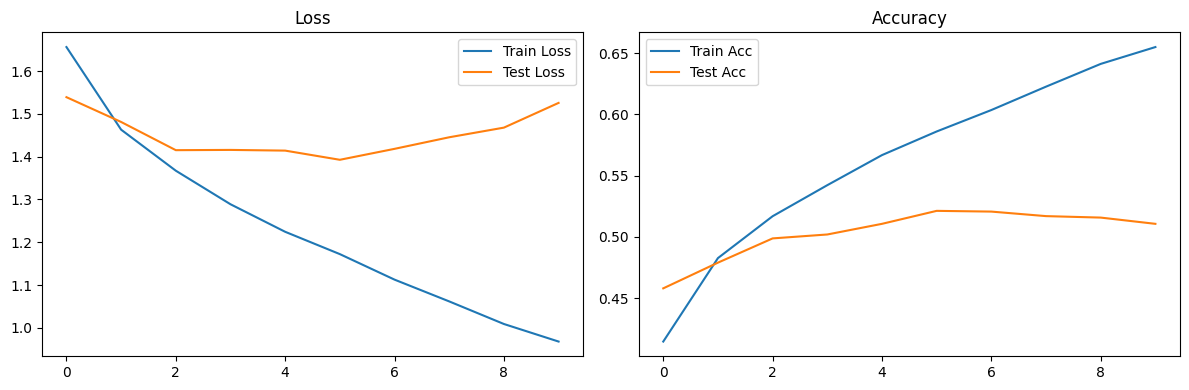

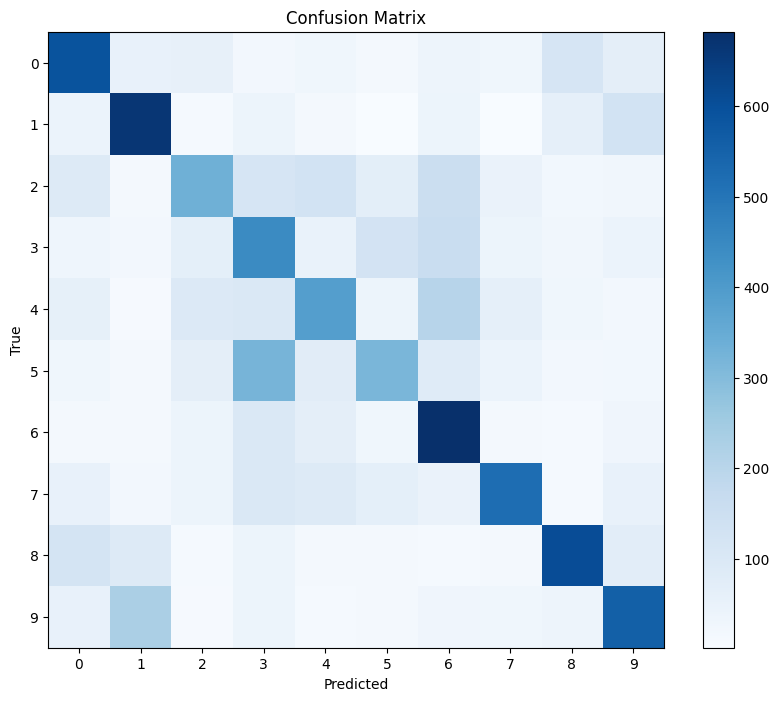

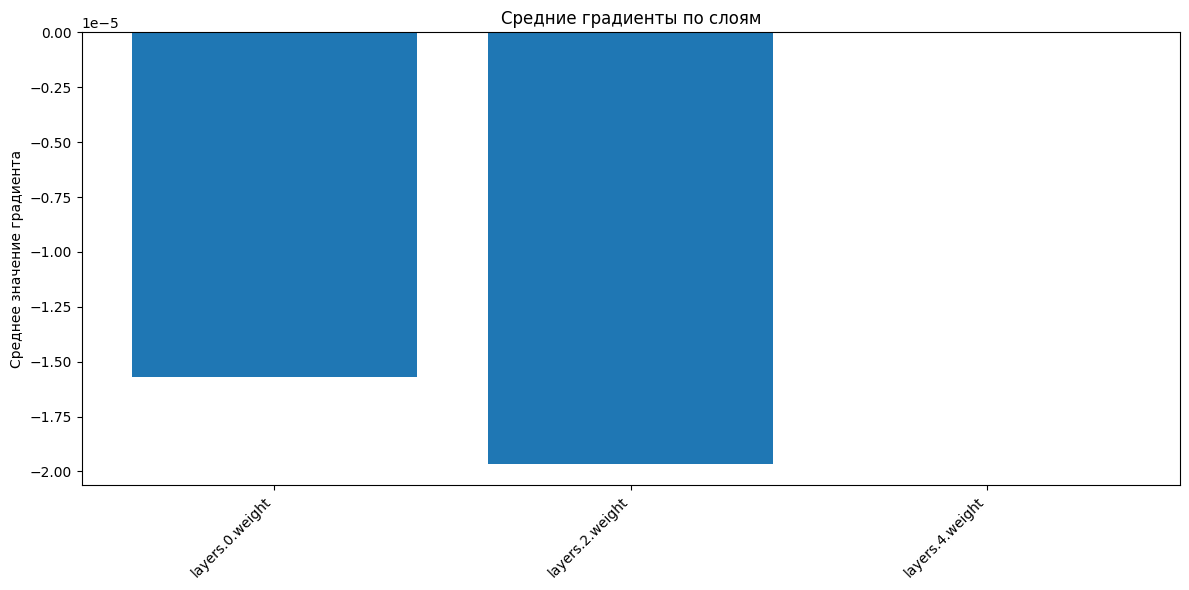

переобучение: 0.1444
Обучение модели ResNetCNN (Параметров: 161482)


100%|██████████| 157/157 [00:02<00:00, 54.05it/s]


Epoch 1/10:
Train Loss: 1.1573, Train Acc: 0.5851
Test Loss: 0.9402, Test Acc: 0.6652
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.70it/s]


Epoch 2/10:
Train Loss: 0.7831, Train Acc: 0.7259
Test Loss: 0.8390, Test Acc: 0.7110
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 60.10it/s]


Epoch 3/10:
Train Loss: 0.6548, Train Acc: 0.7708
Test Loss: 0.6857, Test Acc: 0.7638
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.01it/s]


Epoch 4/10:
Train Loss: 0.5674, Train Acc: 0.8026
Test Loss: 0.6048, Test Acc: 0.7889
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.13it/s]


Epoch 5/10:
Train Loss: 0.4991, Train Acc: 0.8263
Test Loss: 0.7004, Test Acc: 0.7687
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 58.82it/s]


Epoch 6/10:
Train Loss: 0.4441, Train Acc: 0.8457
Test Loss: 0.5775, Test Acc: 0.7994
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.16it/s]


Epoch 7/10:
Train Loss: 0.3956, Train Acc: 0.8614
Test Loss: 0.5596, Test Acc: 0.8100
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 60.58it/s]


Epoch 8/10:
Train Loss: 0.3565, Train Acc: 0.8752
Test Loss: 0.6087, Test Acc: 0.8025
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.96it/s]


Epoch 9/10:
Train Loss: 0.3139, Train Acc: 0.8890
Test Loss: 0.5238, Test Acc: 0.8248
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.71it/s]


Epoch 10/10:
Train Loss: 0.2784, Train Acc: 0.9037
Test Loss: 0.5422, Test Acc: 0.8237
--------------------------------------------------


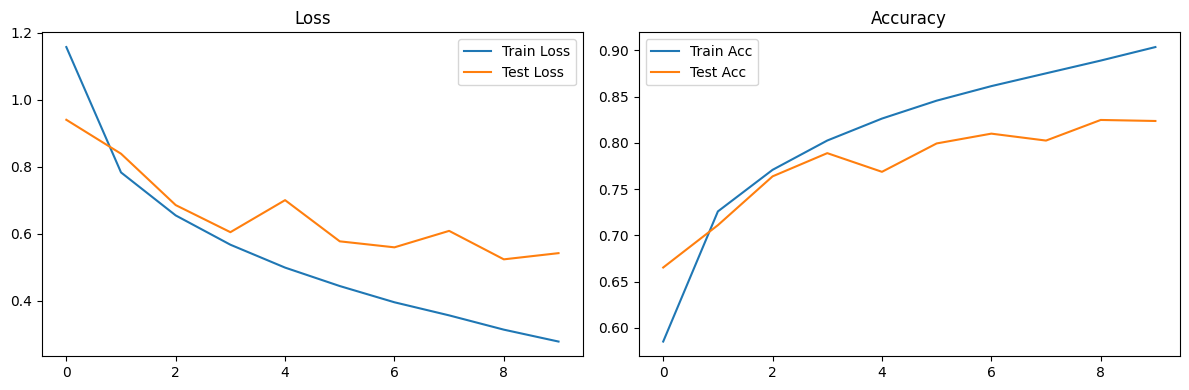

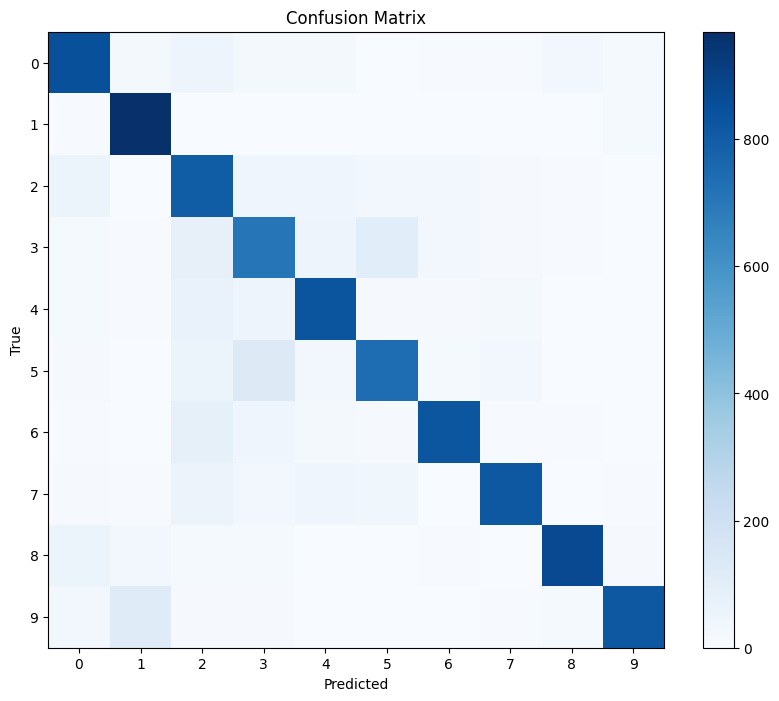

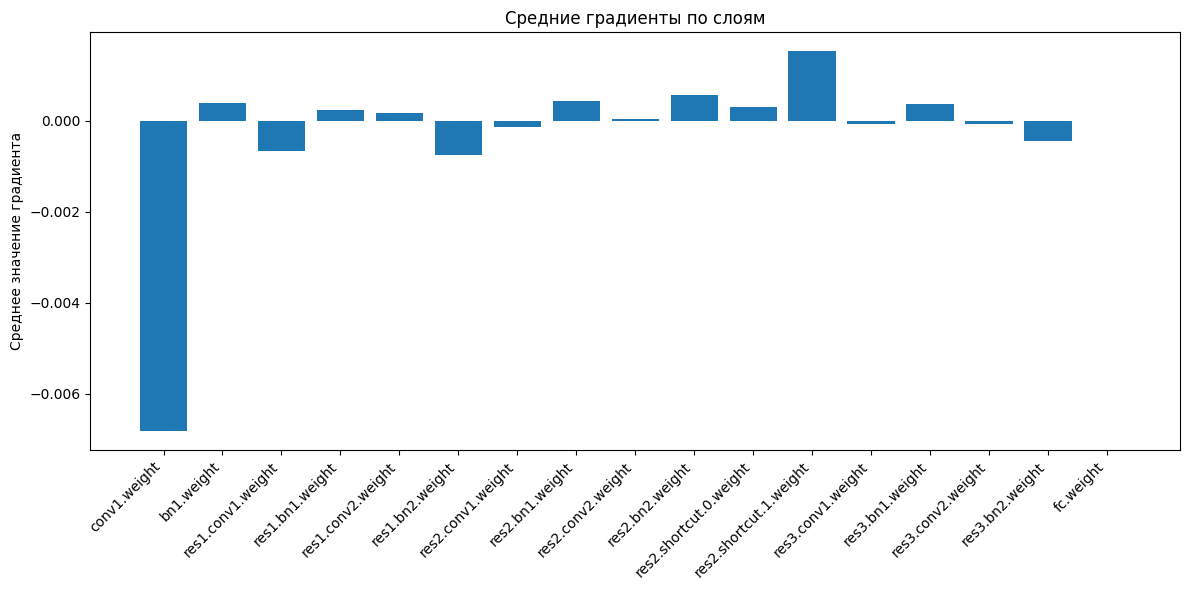

переобучение: 0.0800
Обучение модели RegResNetCNN (Параметров: 161482)


100%|██████████| 157/157 [00:02<00:00, 61.65it/s]


Epoch 1/10:
Train Loss: 1.5603, Train Acc: 0.4351
Test Loss: 1.2891, Test Acc: 0.5422
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 54.82it/s]


Epoch 2/10:
Train Loss: 1.2168, Train Acc: 0.5690
Test Loss: 1.0131, Test Acc: 0.6436
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 60.05it/s]


Epoch 3/10:
Train Loss: 1.0633, Train Acc: 0.6273
Test Loss: 0.9150, Test Acc: 0.6748
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.55it/s]


Epoch 4/10:
Train Loss: 0.9688, Train Acc: 0.6603
Test Loss: 0.8641, Test Acc: 0.6966
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 54.15it/s]


Epoch 5/10:
Train Loss: 0.9039, Train Acc: 0.6848
Test Loss: 0.8016, Test Acc: 0.7152
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.47it/s]


Epoch 6/10:
Train Loss: 0.8498, Train Acc: 0.7035
Test Loss: 0.7385, Test Acc: 0.7392
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 53.98it/s]


Epoch 7/10:
Train Loss: 0.8131, Train Acc: 0.7175
Test Loss: 0.7183, Test Acc: 0.7494
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 60.81it/s]


Epoch 8/10:
Train Loss: 0.7761, Train Acc: 0.7267
Test Loss: 0.6908, Test Acc: 0.7615
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 59.60it/s]


Epoch 9/10:
Train Loss: 0.7474, Train Acc: 0.7397
Test Loss: 0.6557, Test Acc: 0.7721
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.83it/s]


Epoch 10/10:
Train Loss: 0.7273, Train Acc: 0.7456
Test Loss: 0.6396, Test Acc: 0.7757
--------------------------------------------------


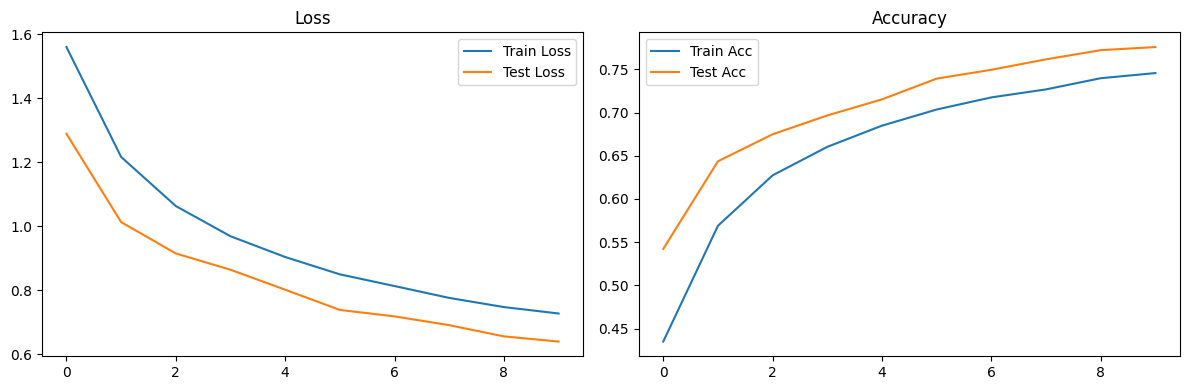

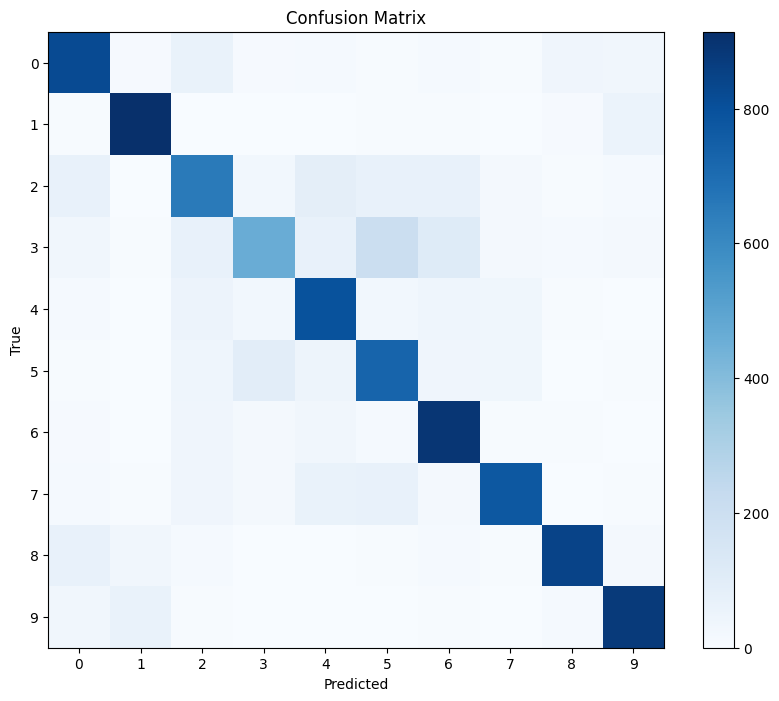

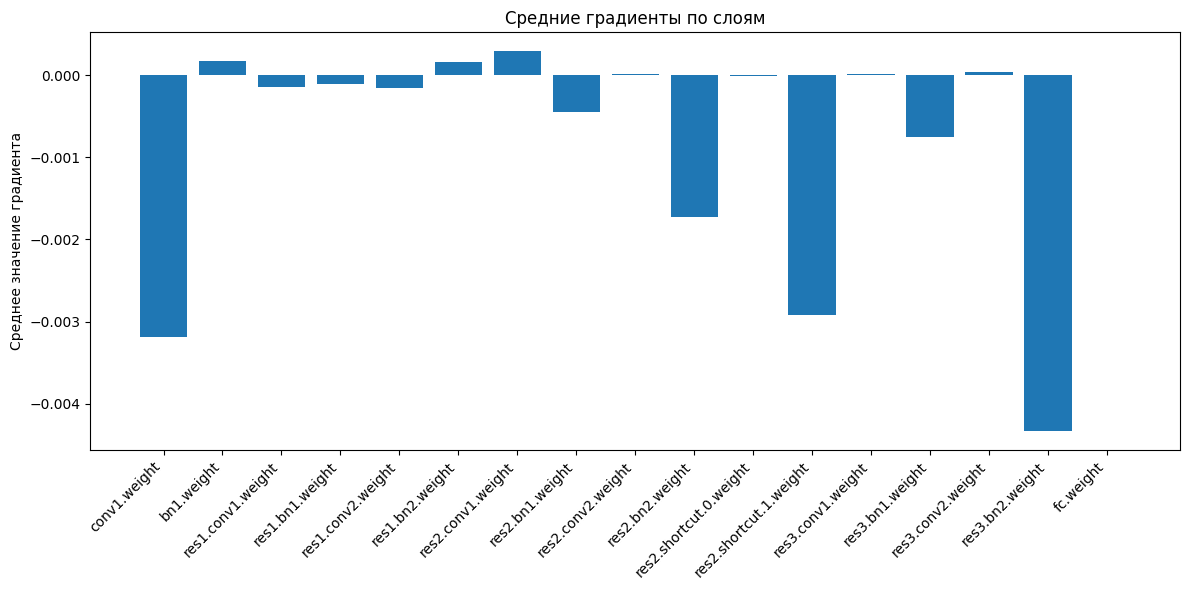

переобучение: -0.0301

Сравнение моделей на CIFAR-10:
Model           Train Acc  Test Acc   Overfit Gap  Train Time (s)  Infer Time (s)  Params    
-------------------------------------------------------------------------------------
FCN             0.6550     0.5106     0.1444       78.92           0.80            820874    
ResNetCNN       0.9037     0.8237     0.0800       334.96          2.20            161482    
RegResNetCNN    0.7456     0.7757     -0.0301      372.68          1.50            161482    


In [14]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datasets import get_cifar_loaders
from models import CNNWithResidual, FullyConnectedModel
from trainer import train_model
from torch import nn 
from utils import plot_training_history, count_parameters
import torch.nn.functional as F

device = "mps"
print(f"Устройство: {device}")

# Загрузка данных CIFAR-10
train_loader, test_loader = get_cifar_loaders(batch_size=64)

# Глубокая полносвязная сеть
fcn_config = {
    "input_size": 3*32*32,
    "num_classes": 10,
    "layers": [
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "linear", "size": 128},
        {"type": "relu"}
    ]
}
fcn = FullyConnectedModel(**fcn_config).to(device)

# CNN с Residual блоками
residual_cnn = CNNWithResidual(input_channels=3, num_classes=10).to(device)

#3. CNN с Residual блоками и регуляризацией
class RegularizedResidualCNN(CNNWithResidual):
    def __init__(self, input_channels=3, num_classes=10, dropout_rate=0.3):
        super().__init__(input_channels, num_classes)
        self.dropout = nn.Dropout2d(dropout_rate)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(self.res1(x))
        x = self.dropout(self.res2(x))
        x = self.dropout(self.res3(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

reg_residual_cnn = RegularizedResidualCNN().to(device)

models = {
    "FCN": fcn,
    "ResNetCNN": residual_cnn,
    "RegResNetCNN": reg_residual_cnn
}

results = {}

# Функция для построения матрицы ошибок
def plot_confusion_matrix(model, loader, device='cpu'):
    model.eval()
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    cm = confusion_matrix(all_targets, all_preds)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.show()

# Функция для анализа градиентов
def analyze_gradients(model, loader, device='cpu'):
    model.train()
    gradients = []
    layer_names = []
    
    # Собираем градиенты по нескольким батчам
    for data, target in loader:
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        loss = F.cross_entropy(output, target)
        
        model.zero_grad()
        loss.backward()
        
        for name, param in model.named_parameters():
            if param.grad is not None and 'weight' in name:
                grad = param.grad.data.mean().item()
                if name not in layer_names:
                    layer_names.append(name)
                    gradients.append([])
                idx = layer_names.index(name)
                gradients[idx].append(grad)
        break
    
    avg_gradients = [np.mean(g) for g in gradients]
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(avg_gradients)), avg_gradients, tick_label=layer_names)
    plt.xticks(rotation=45, ha="right")
    plt.title("Средние градиенты по слоям")
    plt.ylabel("Среднее значение градиента")
    plt.tight_layout()
    plt.show()


def run_inference(model, data_loader, device):
    model.eval()
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.to(device)
            _ = model(data)


# Обучение и оценка моделей
for name, model in models.items():
    print(f"Обучение модели {name} (Параметров: {count_parameters(model)})")

    start_train = time.time()
    history = train_model(model, train_loader, test_loader, epochs=10, device=device)
    end_train = time.time()
    
    start_infer = time.time()
    run_inference(model, test_loader, device)
    end_infer = time.time()
    
    history['train_time'] = end_train - start_train
    history['infer_time'] = end_infer - start_infer
    history['params'] = count_parameters(model)
    results[name] = history
    
    plot_training_history(history)
    plot_confusion_matrix(model, test_loader, device)
    analyze_gradients(model, train_loader, device)
    
    # Анализ переобучения
    overfit_gap = history['train_accs'][-1] - history['test_accs'][-1]
    print(f"переобучение: {overfit_gap:.4f}")

# Сравнительная таблица
print("\nСравнение моделей на CIFAR-10:")
print(f"{'Model':<15} {'Train Acc':<10} {'Test Acc':<10} {'Overfit Gap':<12} {'Train Time (s)':<15} {'Infer Time (s)':<15} {'Params':<10}")
print("-" * 85)
for name, hist in results.items():
    overfit_gap = hist['train_accs'][-1] - hist['test_accs'][-1]
    print(f"{name:<15} {hist['train_accs'][-1]:<10.4f} {hist['test_accs'][-1]:<10.4f} {overfit_gap:<12.4f} {hist['train_time']:<15.2f} {hist['infer_time']:<15.2f} {hist['params']:<10}")